In [307]:
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde

In [308]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [309]:
from sklearn.preprocessing import LabelEncoder

**Load The Dataset**

In [310]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [311]:
train_data.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [312]:
train_data.shape

(22083, 45)

In [313]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [314]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Patient Age,20656.0,6.974148,4.319475,0.000000,3.000000,7.000000,11.000000,14.000000
Blood cell count (mcL),22083.0,4.898871,0.199663,4.092727,4.763109,4.899399,5.033830,5.609829
Mother's age,16047.0,34.526454,9.852598,18.000000,26.000000,35.000000,43.000000,51.000000
Father's age,16097.0,41.972852,13.035501,20.000000,31.000000,42.000000,53.000000,64.000000
Test 1,19956.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test 2,19931.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test 3,19936.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test 4,19943.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Test 5,19913.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
No. of previous abortion,19921.0,2.003062,1.411919,0.000000,1.000000,2.000000,3.000000,4.000000


In [315]:
train_data.isnull().sum()

,0
Patient Id,0
Patient Age,1427
Genes in mother's side,0
Inherited from father,306
Maternal gene,2810
Paternal gene,0
Blood cell count (mcL),0
Patient First Name,0
Family Name,9691
Father's name,0


## **Handle Missing Value**

In [316]:
def impute_numeric_with_kde(df, column_name, valid_range=None):
    """
    Impute missing values in a numeric column using KDE per Genetic Disorder.

    Parameters:
    - df: DataFrame containing the data
    - column_name: Name of the column to impute
    - valid_range: Tuple of (min, max) to clip imputed values (optional)

    Returns:
    - DataFrame with imputed values
    """
    # Get non-missing values per Genetic Disorder
    dist_0 = df.loc[(df['Genetic Disorder'] == 0) & df[column_name].notna(), column_name].values
    dist_1 = df.loc[(df['Genetic Disorder'] == 1) & df[column_name].notna(), column_name].values
    dist_2 = df.loc[(df['Genetic Disorder'] == 2) & df[column_name].notna(), column_name].values
    overall_dist = df.loc[df[column_name].notna(), column_name].values

    # Masks for missing values
    mask_0 = (df['Genetic Disorder'] == 0) & df[column_name].isna()
    mask_1 = (df['Genetic Disorder'] == 1) & df[column_name].isna()
    mask_2 = (df['Genetic Disorder'] == 2) & df[column_name].isna()

    np.random.seed(42)  # For reproducibility

    # Impute using KDE
    if len(dist_0) > 0:
        kde_0 = gaussian_kde(dist_0)
        samples_0 = kde_0.resample(mask_0.sum())[0]
        samples_0 = np.round(samples_0)  # Round to integers
        if valid_range:
            samples_0 = np.clip(samples_0, valid_range[0], valid_range[1])  # Clip to valid range
        df.loc[mask_0, column_name] = samples_0
    else:
        samples_0 = np.random.choice(overall_dist, size=mask_0.sum(), replace=True)
        if valid_range:
            samples_0 = np.clip(samples_0, valid_range[0], valid_range[1])
        df.loc[mask_0, column_name] = samples_0

    if len(dist_1) > 0:
        kde_1 = gaussian_kde(dist_1)
        samples_1 = kde_1.resample(mask_1.sum())[0]
        samples_1 = np.round(samples_1)
        if valid_range:
            samples_1 = np.clip(samples_1, valid_range[0], valid_range[1])
        df.loc[mask_1, column_name] = samples_1
    else:
        samples_1 = np.random.choice(overall_dist, size=mask_1.sum(), replace=True)
        if valid_range:
            samples_1 = np.clip(samples_1, valid_range[0], valid_range[1])
        df.loc[mask_1, column_name] = samples_1

    if len(dist_2) > 0:
        kde_2 = gaussian_kde(dist_2)
        samples_2 = kde_2.resample(mask_2.sum())[0]
        samples_2 = np.round(samples_2)
        if valid_range:
            samples_2 = np.clip(samples_2, valid_range[0], valid_range[1])
        df.loc[mask_2, column_name] = samples_2
    else:
        samples_2 = np.random.choice(overall_dist, size=mask_2.sum(), replace=True)
        if valid_range:
            samples_2 = np.clip(samples_2, valid_range[0], valid_range[1])
        df.loc[mask_2, column_name] = samples_2

    return df

In [317]:
def impute_categorical_with_proportions_improved(df, column_name):
    overall_data = df.loc[df[column_name].notna(), column_name]
    overall_proportions = overall_data.value_counts(normalize=True)
    overall_categories = overall_proportions.index
    overall_proportions = overall_proportions.values

    for disorder in [0, 1, 2]:
        mask_non_missing = (df['Genetic Disorder'] == disorder) & df[column_name].notna()
        mask_missing = (df['Genetic Disorder'] == disorder) & df[column_name].isna()

        if mask_missing.sum() == 0:
            continue

        if mask_non_missing.sum() > 0:
            group_data = df.loc[mask_non_missing, column_name]
            group_proportions = group_data.value_counts(normalize=True)
            for cat in overall_categories:
                if cat not in group_proportions.index:
                    group_proportions[cat] = 0
            group_proportions = group_proportions[overall_categories]
            categories = group_proportions.index
            proportions = group_proportions.values
        else:
            categories = overall_categories
            proportions = overall_proportions

        np.random.seed(42)
        imputed_values = np.random.choice(categories, size=mask_missing.sum(), p=proportions, replace=True)
        df.loc[mask_missing, column_name] = imputed_values

    return df

**Patient Id**

In [318]:
train_data["Patient Id"]

,Patient Id
0,PID0x6418
1,PID0x25d5
2,PID0x4a82
3,PID0x4ac8
4,PID0x1bf7
...,...
22078,PID0x5598
22079,PID0x19cb
22080,PID0x3c4f
22081,PID0x13a


Every patient have different "Patient Id". We will drop this column.

In [319]:
train_data = train_data.drop(columns=["Patient Id"])

In [320]:
train_data.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,21.0,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,32.0,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


**Patient First Name**

In [321]:
train_data["Patient First Name"]

,Patient First Name
0,Richard
1,Mike
2,Kimberly
3,Jeffery
4,Johanna
...,...
22078,Lynn
22079,Matthew
22080,John
22081,Sharon


In [322]:
train_data["Patient First Name"].value_counts()

,count
Patient First Name,
James,420
John,372
Robert,355
Mary,329
Michael,321
...,...
Sharice,1
Shasta,1
Maryalice,1


Lot's of different value.

In [323]:
train_data = train_data.drop(columns="Patient First Name")

**Family Name**

In [324]:
train_data["Family Name"]

,Family Name
0,NaN
1,NaN
2,NaN
3,Hoelscher
4,Stutzman
...,...
22078,NaN
22079,Farley
22080,NaN
22081,NaN


Family Name column have also lot;s of unique value

In [325]:
train_data = train_data.drop(columns="Family Name")

**Father's name**

In [326]:
train_data["Father's name"]

,Father's name
0,Larre
1,Brycen
2,Nashon
3,Aayaan
4,Suave
...,...
22078,Alhassane
22079,Dartanion
22080,Cavani
22081,Bomer


In [327]:
train_data = train_data.drop(columns="Father's name")

In [328]:
train_data = train_data.drop(columns=["Institute Name","Location of Institute","Disorder Subclass"])

In [329]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      16047 non-null  float64
 7   Father's age                                      16097 non-null  float64
 8   Status                                            22083 non-null  object 
 9   Respiratory Rate 

In [330]:
train_data.isnull().sum()

,0
Patient Age,1427
Genes in mother's side,0
Inherited from father,306
Maternal gene,2810
Paternal gene,0
Blood cell count (mcL),0
Mother's age,6036
Father's age,5986
Status,0
Respiratory Rate (breaths/min),2149


**Genectic Disorder**

In [331]:
train_data["Genetic Disorder"]

,Genetic Disorder
0,Mitochondrial genetic inheritance disorders
1,NaN
2,Multifactorial genetic inheritance disorders
3,Mitochondrial genetic inheritance disorders
4,Multifactorial genetic inheritance disorders
...,...
22078,Mitochondrial genetic inheritance disorders
22079,Multifactorial genetic inheritance disorders
22080,Mitochondrial genetic inheritance disorders
22081,NaN


**Patients age**

In [332]:
train_data["Genetic Disorder"].value_counts()

,count
Genetic Disorder,
Mitochondrial genetic inheritance disorders,10202
Single-gene inheritance diseases,7664
Multifactorial genetic inheritance disorders,2071


<ipython-input-333-3803d7bee52f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genetic Disorder', data=train_data, palette="bright")


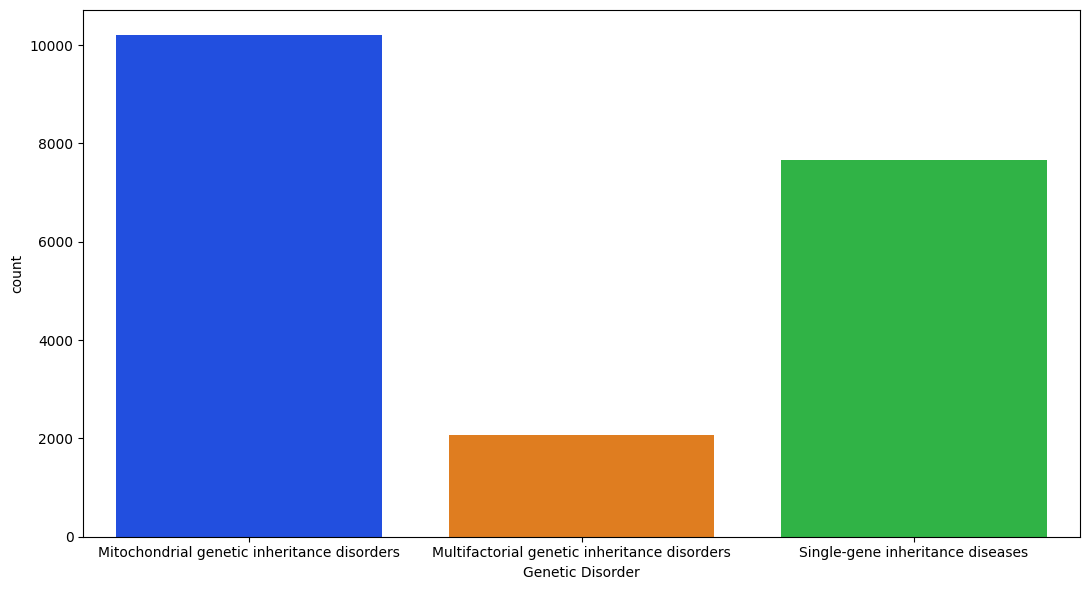

In [333]:
plt.figure(figsize=(11, 6))
sns.countplot(x='Genetic Disorder', data=train_data, palette="bright")
plt.tight_layout()

In [334]:
train_data["Genetic Disorder"].unique()

array(['Mitochondrial genetic inheritance disorders', nan,
       'Multifactorial genetic inheritance disorders',
       'Single-gene inheritance diseases'], dtype=object)

In target column have some missing value. we will drop these rows

In [335]:
train_data = train_data.dropna(subset=["Genetic Disorder"])

In [336]:
train_data["Genetic Disorder"].unique()

array(['Mitochondrial genetic inheritance disorders',
       'Multifactorial genetic inheritance disorders',
       'Single-gene inheritance diseases'], dtype=object)

In [337]:
label_encoder = LabelEncoder()

In [338]:
train_data["Genetic Disorder"] = label_encoder.fit_transform(train_data["Genetic Disorder"])

<ipython-input-338-f62c9fa7dbf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Genetic Disorder"] = label_encoder.fit_transform(train_data["Genetic Disorder"])


In [339]:
train_data["Genetic Disorder"].value_counts()

,count
Genetic Disorder,
0,10202
2,7664
1,2071


In [340]:
train_data.isnull().sum()

,0
Patient Age,1225
Genes in mother's side,0
Inherited from father,261
Maternal gene,2424
Paternal gene,0
Blood cell count (mcL),0
Mother's age,5204
Father's age,5165
Status,0
Respiratory Rate (breaths/min),1826


In [341]:
train_data.shape

(19937, 38)

**Patient Age**

<Axes: xlabel='Patient Age', ylabel='Genetic Disorder'>

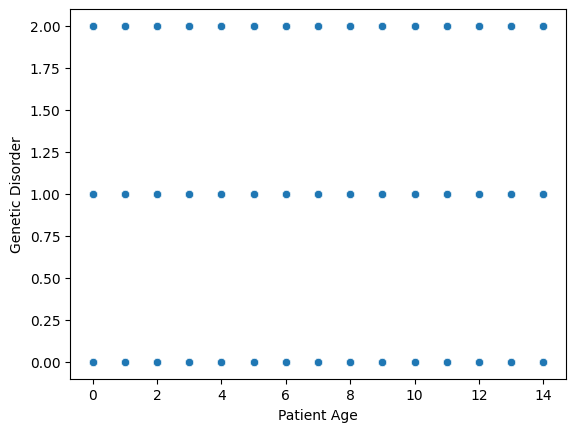

In [342]:
sns.scatterplot(x="Patient Age", y="Genetic Disorder", data=train_data)

In [343]:
train_data["Patient Age"].isnull().sum()

1225

<ipython-input-344-6b14272a927f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Patient Age', data=train_data, palette="bright")


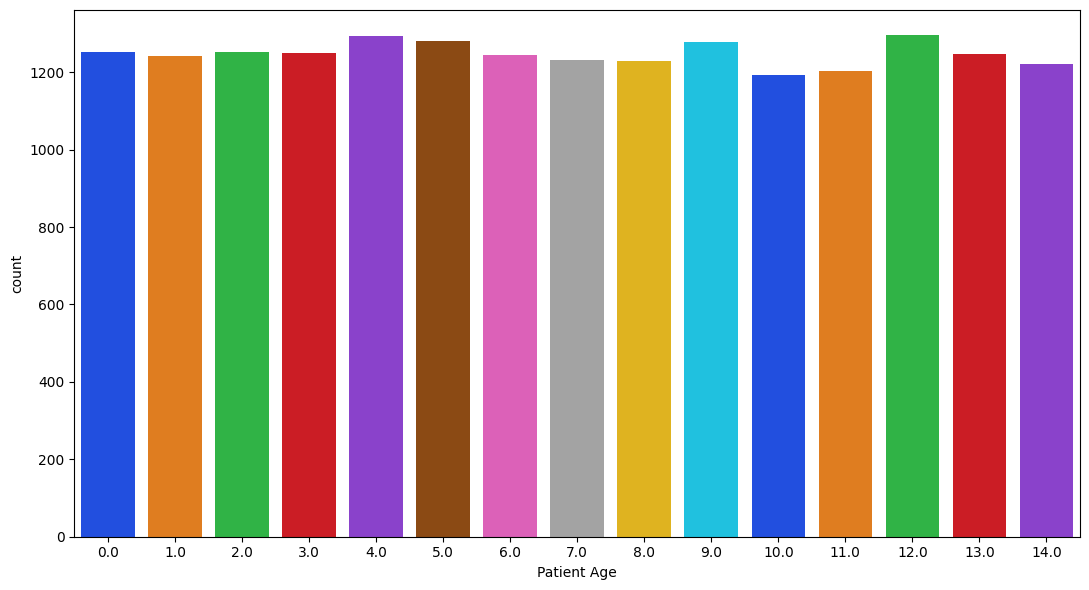

In [344]:
plt.figure(figsize=(11, 6))
sns.countplot(x='Patient Age', data=train_data, palette="bright")
plt.tight_layout()

In [345]:
# Handle missing value
train_data = impute_numeric_with_kde(train_data, 'Patient Age', valid_range=(0, 14))

In [346]:
train_data["Patient Age"].isnull().sum()

0

<ipython-input-347-6b14272a927f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Patient Age', data=train_data, palette="bright")


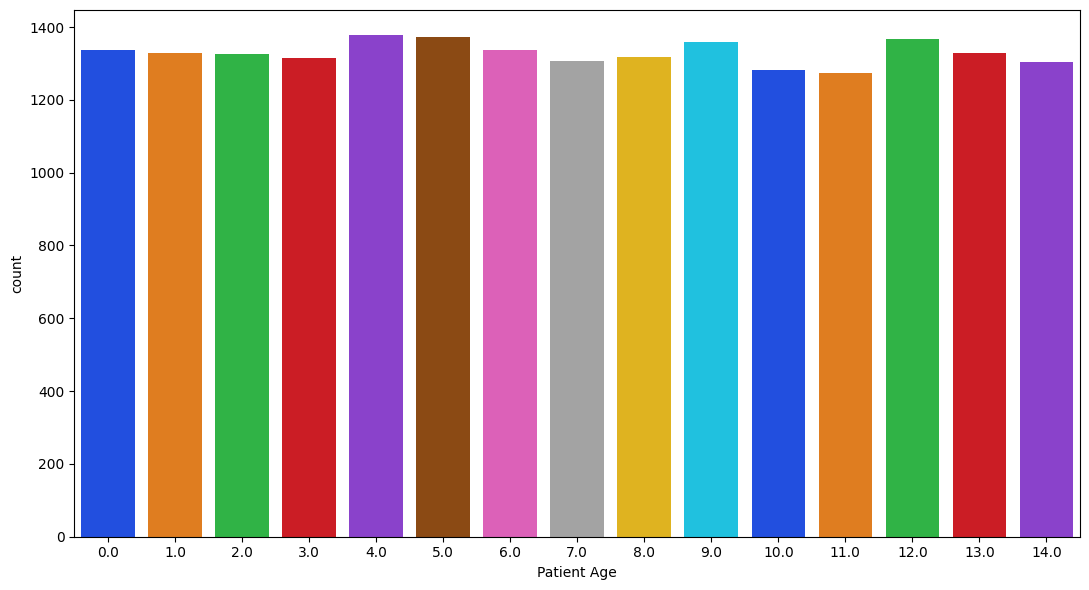

In [347]:
plt.figure(figsize=(11, 6))
sns.countplot(x='Patient Age', data=train_data, palette="bright")
plt.tight_layout()

**Genes in mother's side**

In [348]:
train_data["Genes in mother's side"]

,Genes in mother's side
0,Yes
2,Yes
3,Yes
4,Yes
5,Yes
...,...
22077,No
22078,Yes
22079,No
22080,Yes


In [349]:
train_data["Genes in mother's side"].value_counts()

,count
Genes in mother's side,
Yes,11848
No,8089


<Axes: xlabel="Genes in mother's side", ylabel='count'>

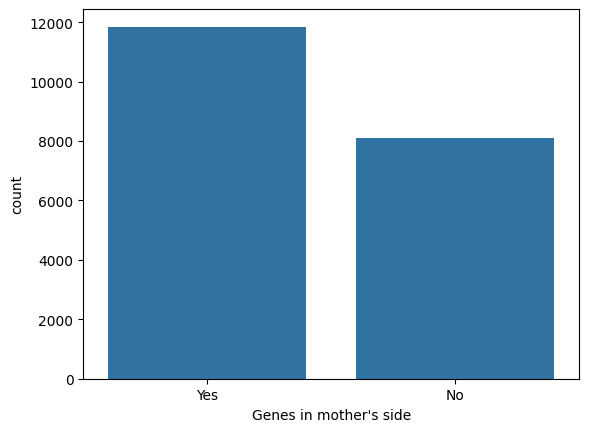

In [350]:
sns.countplot(x="Genes in mother's side", data=train_data)

<Axes: xlabel="Genes in mother's side", ylabel='count'>

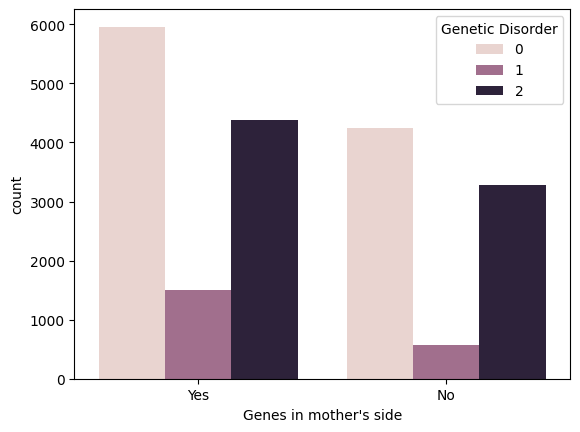

In [351]:
sns.countplot(x="Genes in mother's side", data=train_data, hue="Genetic Disorder")

In [352]:
train_data["Genes in mother's side"].isnull().sum()

0

**Inherited from father**

In [353]:
train_data["Inherited from father"]

,Inherited from father
0,No
2,No
3,No
4,No
5,No
...,...
22077,Yes
22078,Yes
22079,Yes
22080,No


In [354]:
train_data["Inherited from father"].value_counts()

,count
Inherited from father,
No,11873
Yes,7803


<Axes: xlabel='Inherited from father', ylabel='count'>

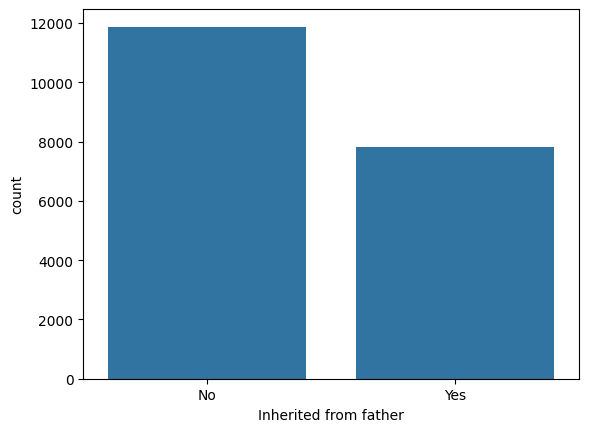

In [355]:
sns.countplot(x="Inherited from father", data=train_data)

<Axes: xlabel='Inherited from father', ylabel='count'>

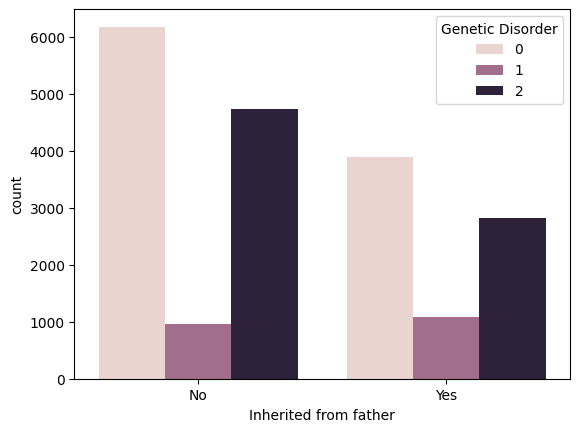

In [356]:
sns.countplot(x="Inherited from father", hue="Genetic Disorder", data=train_data)

In [357]:
train_data["Genetic Disorder"].isnull().sum()

0

**Maternal gene**

In [358]:
train_data["Maternal gene"]

,Maternal gene
0,Yes
2,No
3,Yes
4,NaN
5,Yes
...,...
22077,Yes
22078,Yes
22079,No
22080,Yes


In [359]:
train_data["Maternal gene"].value_counts()

,count
Maternal gene,
Yes,9671
No,7842


<Axes: xlabel='Maternal gene', ylabel='count'>

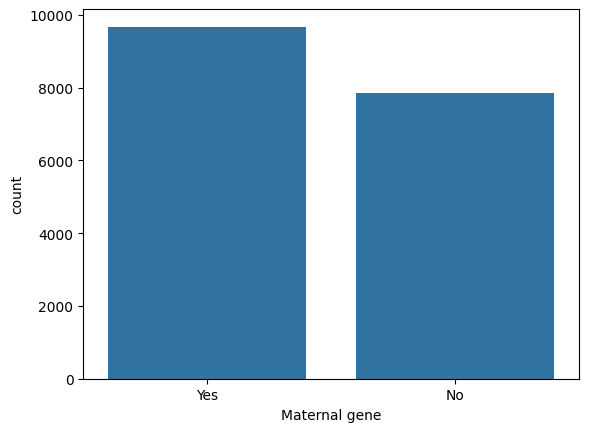

In [360]:
sns.countplot(x="Maternal gene", data=train_data)

<Axes: xlabel='Maternal gene', ylabel='count'>

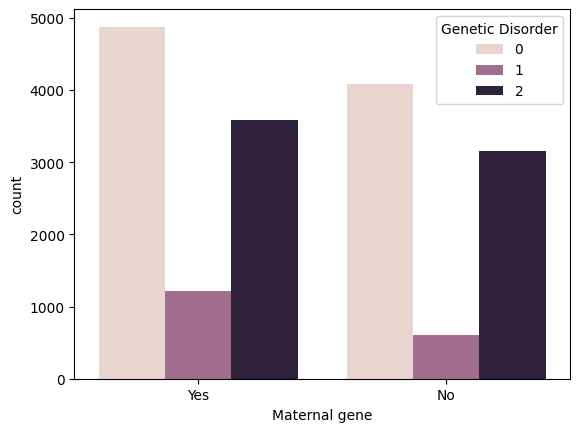

In [361]:
sns.countplot(x="Maternal gene", data=train_data, hue="Genetic Disorder")

In [362]:
train_data["Maternal gene"].isnull().sum()

2424

In [363]:
# Handle missing value
train_data = impute_categorical_with_proportions_improved(train_data, 'Maternal gene')

In [364]:
train_data["Maternal gene"].isnull().sum()

0

<Axes: xlabel='Maternal gene', ylabel='count'>

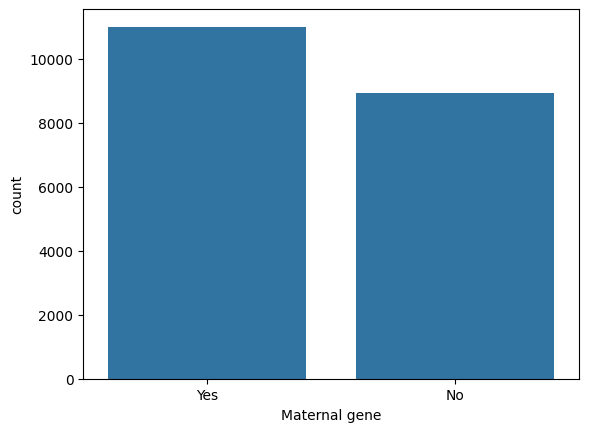

In [365]:
sns.countplot(x="Maternal gene", data=train_data)

In [366]:
train_data["Maternal gene"].value_counts()

,count
Maternal gene,
Yes,11012
No,8925


**Paternal gene**

In [367]:
train_data["Paternal gene"]

,Paternal gene
0,No
2,No
3,No
4,Yes
5,No
...,...
22077,Yes
22078,No
22079,Yes
22080,No


In [368]:
train_data["Paternal gene"].value_counts()

,count
Paternal gene,
No,11297
Yes,8640
